<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Data%20Analysis%20with%20Python/Module_5_%E2%80%93_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis with Python**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Módulo 5 – Model Evaluation**

**Objetivos**

Evluar y perfeccionar modelos de predicción

In [2]:
#importar librerias
import pandas as pd
import numpy as np

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.to_csv('Module_5_auto_csv')

In [6]:
#Primero solo utilizamos datos numericos
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:
#librerias para graficar
from ipywidgets import interact, interactive, fixed, interact_manual

**Functions for Plotting**

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**Part 1: Training and Testing**

Un paso importante en el Test del modelo es dividir los datos en Training y Testing. Pondremos nuestro dato objetivo "price" en un dataframe separado y_data:

In [10]:
y_data = df["price"]

Eliminamos "price" en un nuevo dataframe x_data

In [11]:
x_data = df.drop("price", axis=1)

Separemos nuestros datos en Training y Testing utilizando **train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples :", x_train.shape[0])

number of test samples : 21
number of training samples : 180


El parametro **test_size** indica la proporcion de datos que dividiran para Testing, en ejemplo anterior se considero 10% de los datos para Testing.

**Question #1**

Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1". 

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data,test_size=.40, random_state=0)

print("number of test samples : ", x_test1.shape[0])
print("number of training samples", x_train1.shape[0])

number of test samples :  81
number of training samples 120


Importar **LinearRegression** desde el modulo linear_model.


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lre = LinearRegression()

In [17]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [18]:
#Calculemos la R^2 en los datos de Test

lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [19]:
#Podemos ver que la R^2 es mucho menor utilizando los datos Test que los datos de Training

lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

**Question #2**

Encuentra la R^2 utilizando el 40% de los datos para Testing

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=.40, random_state=0)

lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

**Cross-Validation Score**

Importemos **model_selection** desde el modulo cross_val_score.

In [22]:
from sklearn.model_selection import cross_val_score

Igresemos el objeto, la caracteristica/feature ("horsepower"), y el target (y-data). El parametro "cv" determina el numero de pliegues, en este caso es 4.


In [23]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

la puntuación es R^2. Cada elemento en el arreglo tendra el valor promedio de R^2.

In [24]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Podemos calcular el promedio y la desviacion estandar de nuestra estiación:

In [25]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [26]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

**Question #3**

Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [27]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

Tambien podemos utilizar la función "cross_val_predict" para predecir la salida.

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

**Part 2: Overfitting, Underfitting and Model Selection**

Crear objetos de Regresion lineal multiple utilizando 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg' como features.


In [30]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediccion utilizando los siguientes datos de entrenamiento:

In [31]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediccion utilizando los siguientes datos de prueba:

In [37]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Realizar evaluación de los modelos.


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


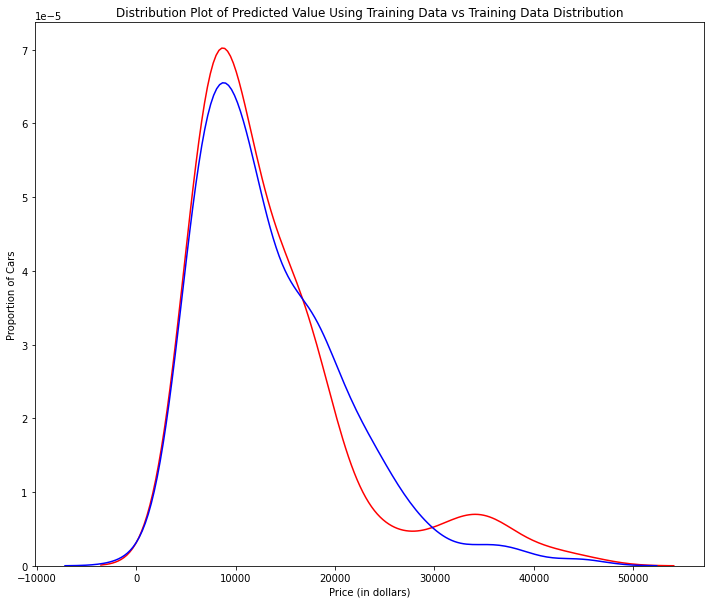

In [39]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


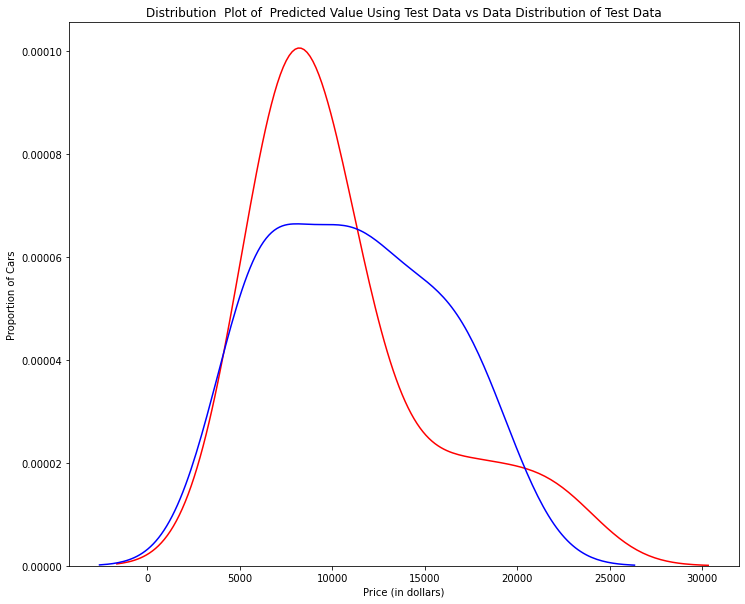

In [40]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)